# Template Matching

The idea is to find a specific section of image (template) on others (bigger that the template).

The template is sweeped over the big image (as with 2D convolution), applying an specific matching or comparison equation.

If input image size is $(W, H)$, and the template is $(w, h)$, the matching image is $(W-w+1, H-h+1)$

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Import image:

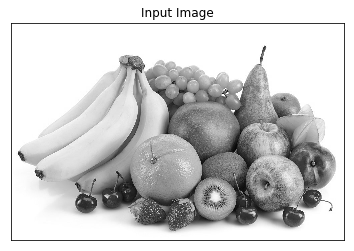

In [2]:
imgFruits = cv2.imread('fruits.jpg',0)
plt.imshow(imgFruits, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

Extract template:

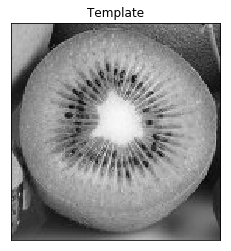

In [3]:
imgKiwi = np.copy(imgFruits[460:600, 545:680])
plt.imshow(imgKiwi, cmap = 'gray', vmin=0, vmax=255)
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.show()
w, h = imgKiwi.shape[::-1]

## Squared difference

\begin{align}
\large
R(x,y) = \sum_{x',y'} (T(x',y') - I(x+x',y+y'))^2
\end{align}


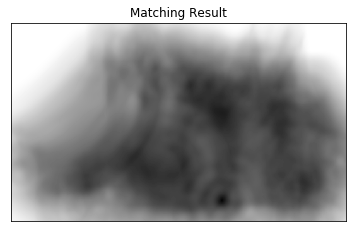

In [11]:
imgFruits1 = imgFruits.copy()
res = cv2.matchTemplate(imgFruits1, imgKiwi, cv2.TM_SQDIFF)
_, _, top_left, _ = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(imgFruits1,top_left, bottom_right, 255, 2)
plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()

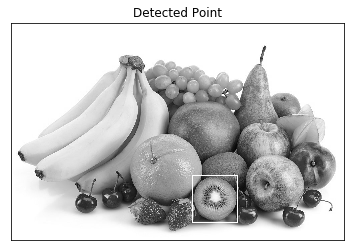

In [12]:
plt.imshow(imgFruits1,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

## Squared difference normalized

\begin{align}
\large
R(x,y) = \frac {\sum_{x',y'} (T(x',y') - I(x+x',y+y'))^2} {\sqrt{ \sum_{x',y'} T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2 }}
\end{align}


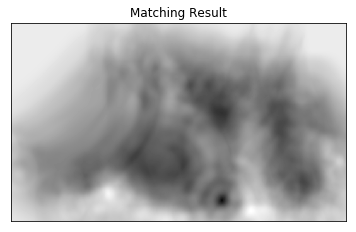

In [16]:
imgFruits2 = imgFruits.copy()
res = cv2.matchTemplate(imgFruits2, imgKiwi, cv2.TM_SQDIFF_NORMED)
_, _, top_left, _ = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(imgFruits2,top_left, bottom_right, 255, 2)
plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()

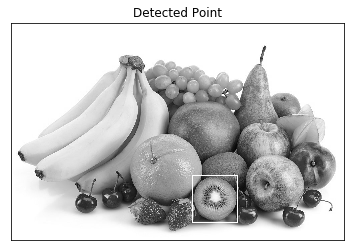

In [17]:
plt.imshow(imgFruits2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

## Correlation

\begin{align}
\large
R(x,y) = \sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))
\end{align}


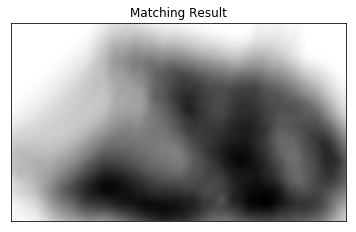

In [18]:
imgFruits3 = imgFruits.copy()
res = cv2.matchTemplate(imgFruits3, imgKiwi, cv2.TM_CCORR)
_, _, _, top_left = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(imgFruits3,top_left, bottom_right, 255, 2)
plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()

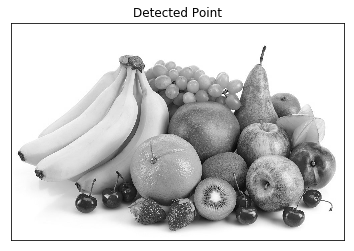

In [20]:
plt.imshow(imgFruits3,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

## Correlation normalized

\begin{align}
\large
R(x,y) = \frac {\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))} {\sqrt{ \sum_{x',y'} T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2 }}
\end{align}


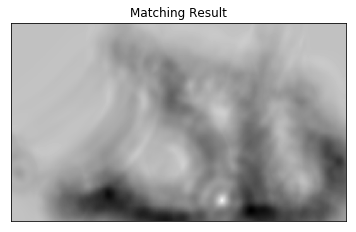

In [28]:
imgFruits4 = imgFruits.copy()
res = cv2.matchTemplate(imgFruits4, imgKiwi, cv2.TM_CCORR_NORMED)
_, _, _, top_left = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(imgFruits4,top_left, bottom_right, 255, 2)
plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()

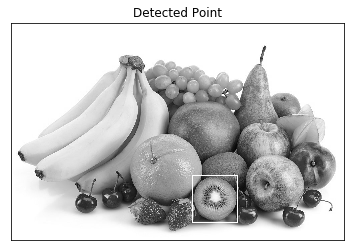

In [29]:
plt.imshow(imgFruits4,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

## Other methods

* TM_CCOEFF
* TM_CCOEFF_NORMED

# Multiscale Detection

Source: https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/

![SegmentLocal](res/img/template_multiscale.gif "segment")